# Labs Access Analysis: 02 Stats Plot

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import os
import time

sns.set()
#sns.set_style("whitegrid") # Seaborn style

In [2]:
# Load data
data = pd.read_csv('data/labs.csv')

In [3]:
data.head()

,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes
0,Fab Lab Barcelona,Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN
1,MADE Makerspace Barcelona,Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN
2,Soko Tech,Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN
3,LSCongres,Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN
4,Green Fab Lab,Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN


In [4]:
data["Notes"].describe()

count          6
unique         1
top       Closed
freq           6
Name: Notes, dtype: object

In [5]:
data["Notes"].value_counts()

Closed    6
Name: Notes, dtype: int64

## Analysis - Type of Labs

In [6]:
data["Type"].describe()

count          49
unique          9
top       Fab Lab
freq           18
Name: Type, dtype: object

In [7]:
data["Type"].value_counts()

Fab Lab                 18
Makerspace               9
Hackerspace              6
Ateneu de Fabricació     6
Service                  3
DIYBio Lab               3
City Space               2
Library                  1
FabCafé                  1
Name: Type, dtype: int64

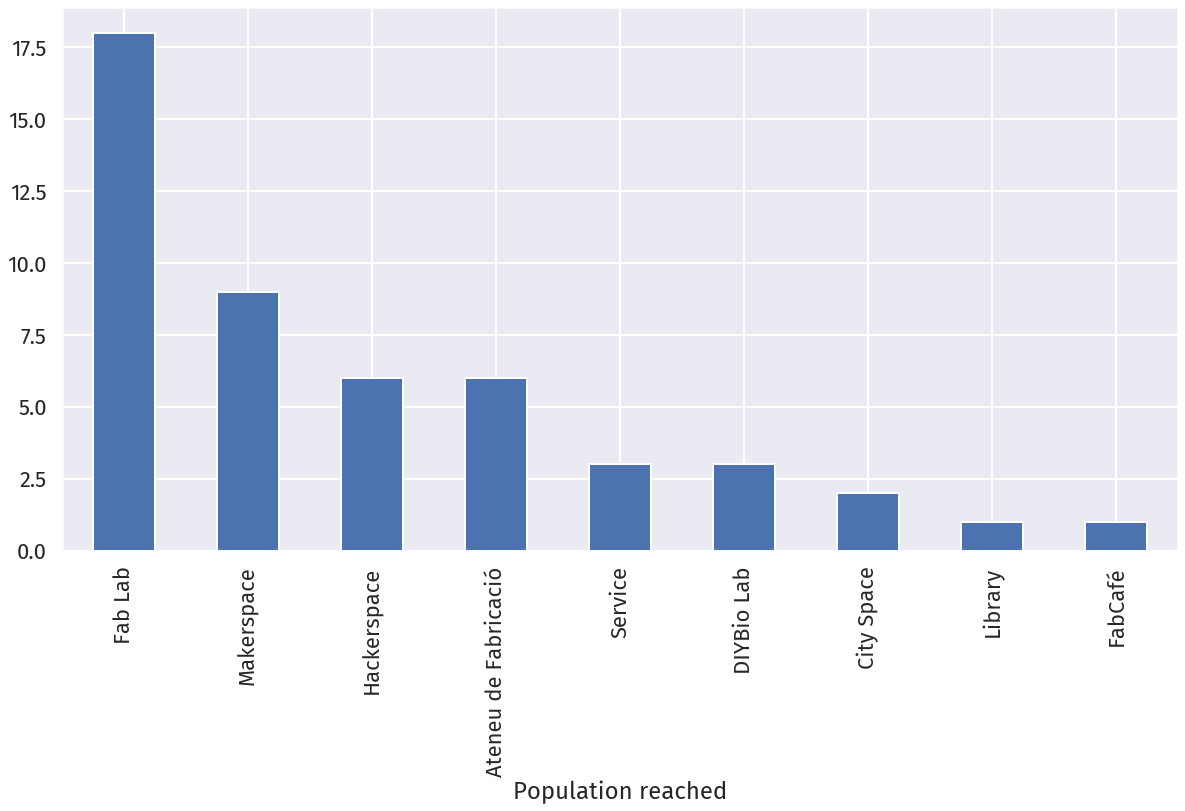

In [8]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
data["Type"].value_counts().plot(kind="bar", figsize=(20,10))
plt.xlabel('Population reached')
plt.savefig("svg/labs_type.svg", bbox_inches="tight")
plt.savefig("png/labs_type.png", dpi=300, bbox_inches="tight")

## Analysis - Cities

In [9]:
data["Cluster"].describe()

count      49
unique      2
top       BCN
freq       31
Name: Cluster, dtype: object

In [10]:
data["Cluster"].value_counts()

BCN    31
MI     18
Name: Cluster, dtype: int64

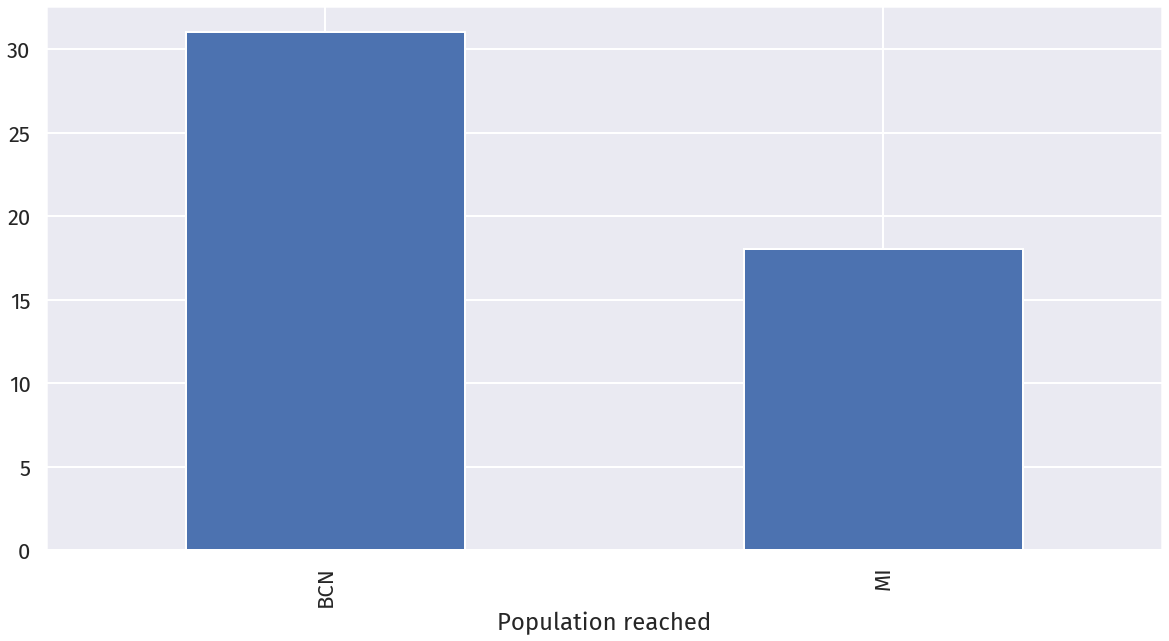

In [11]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
data["Cluster"].value_counts().plot(kind="bar", figsize=(20,10))
plt.xlabel('Population reached')
plt.savefig("svg/labs_cluster.svg", bbox_inches="tight")
plt.savefig("png/labs_cluster.png", dpi=300, bbox_inches="tight")

## Labs Type by Cluster (City)

In [12]:
gp = data.groupby('Cluster')

In [13]:
gp["Type"].sum()

Cluster
BCN    Fab LabFab LabFab LabFab LabFab LabFab LabFab ...
MI     Fab LabFab LabServiceFab LabMakerspaceFab LabF...
Name: Type, dtype: object

In [14]:
data.groupby(['Cluster','Type']).size()

Cluster  Type                
BCN      Ateneu de Fabricació    6
         City Space              2
         DIYBio Lab              2
         Fab Lab                 9
         FabCafé                 1
         Hackerspace             4
         Library                 1
         Makerspace              5
         Service                 1
MI       DIYBio Lab              1
         Fab Lab                 9
         Hackerspace             2
         Makerspace              4
         Service                 2
dtype: int64

<AxesSubplot:ylabel='Cluster,Type'>

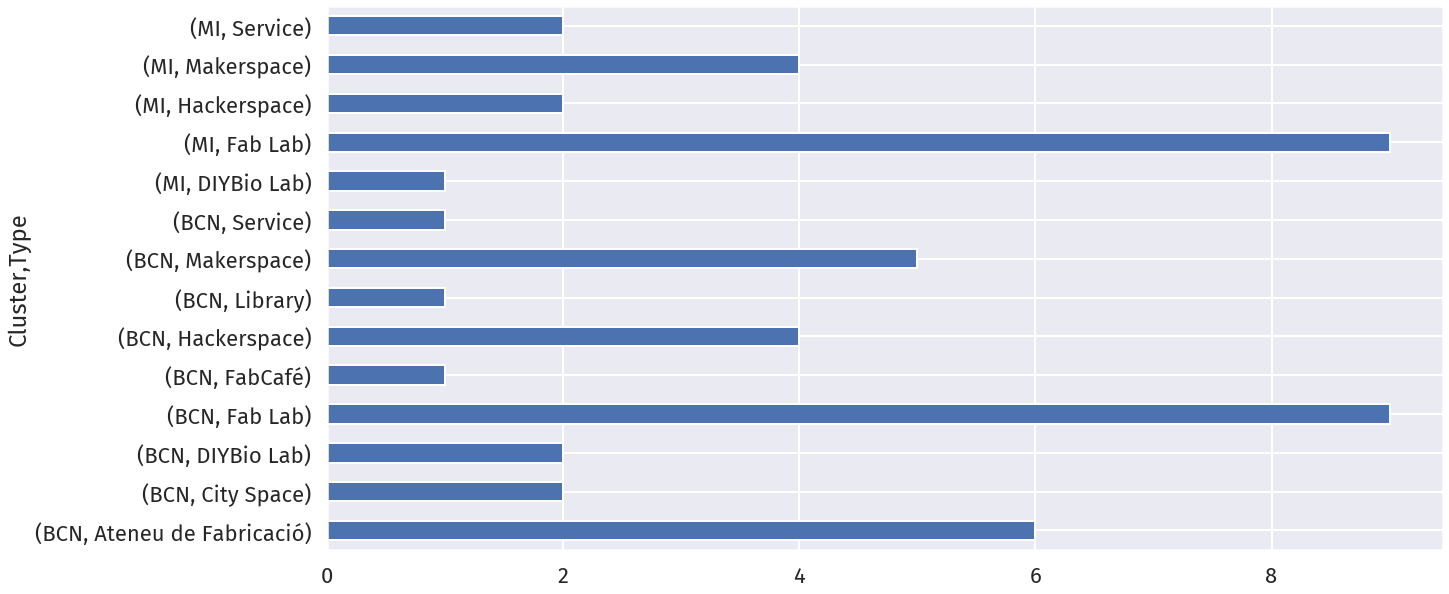

In [15]:
data.groupby(['Cluster','Type']).size().plot(kind="barh", figsize=(20,10))

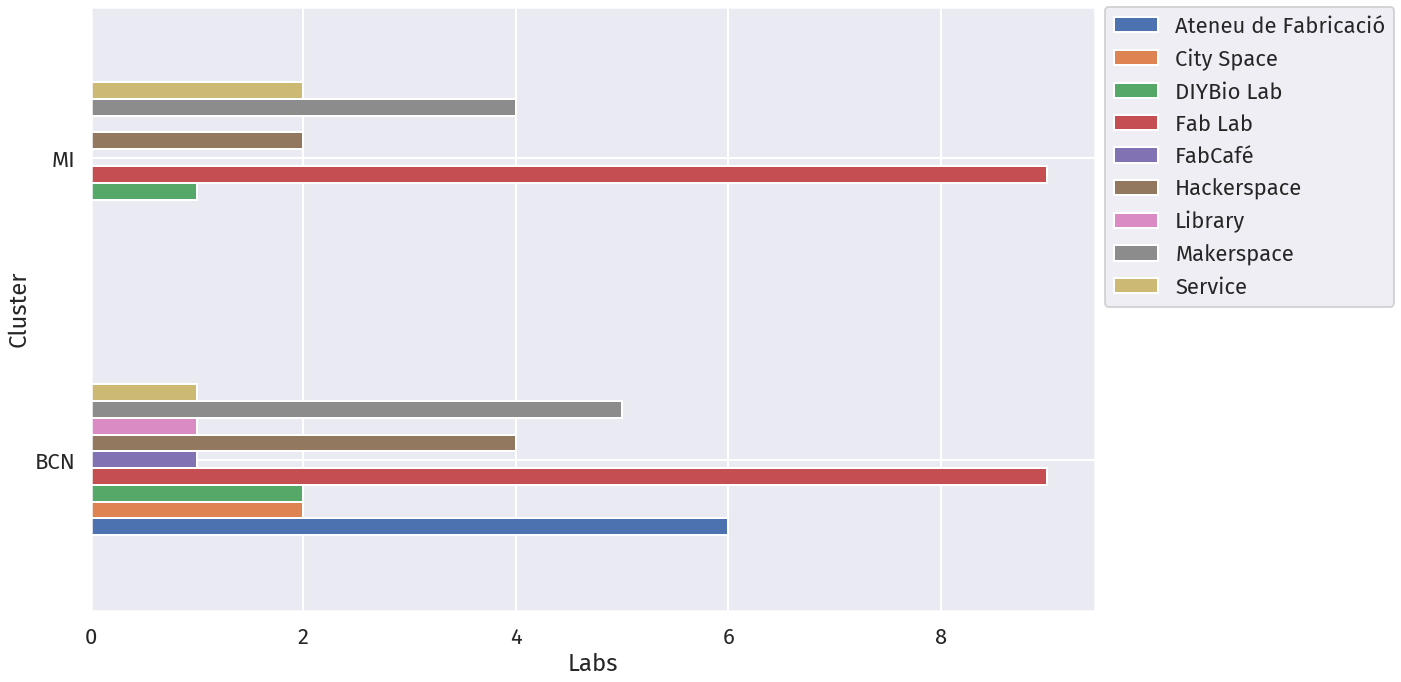

In [16]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
data.groupby(['Cluster','Type']).size().unstack().plot(kind='barh', figsize=(20,10))
plt.xlabel('City')
plt.xlabel('Labs')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.savefig("svg/labs_cluster.svg", bbox_inches="tight")
plt.savefig("png/labs_cluster.png", dpi=300, bbox_inches="tight")